# TP 10 - Parcours et arbres couvrants

Commencez par créer un graphe **connexe** aléatoire `G`, de type $G_{n,m}$, avec 10 sommets et 15 arêtes

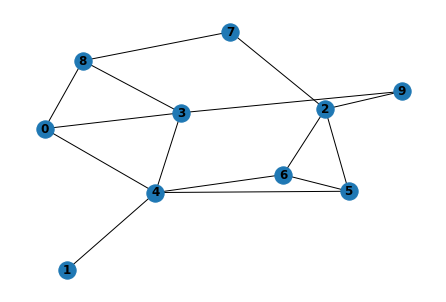

In [117]:
import networkx as nx
import numpy as np

G = nx.gnp_random_graph(10, 0.39, seed=2)
nx.draw(G, with_labels=True, font_weight='bold')

## Exercice 1 : Parcours en largeur (BFS)
Ecrivez une fonction `BFSTraversal` qui prend en paramètre un graphe `G` et un sommet de départ `s`, et qui renvoie, sous forme d'une liste, l'ordre de parcours en largeur des sommets du graphe `G` (les voisins sont pris dans l'ordre croissant de leur numéro).

In [118]:
def BFSTraversal(G, s):
    visited = []
    queue = [s]
    while queue:
        node = queue.pop(0)
        if node not in visited:
            visited.append(node)
            unvisited = [n for n in G[node] if n not in visited]
            queue.extend(unvisited)
    return visited

Testez votre fonction sur le graphe `G` créé au début du TP

In [119]:
BFSTraversal(G, 0)

[0, 3, 4, 8, 9, 1, 5, 6, 7, 2]

## Exercice 2 : Parcours en profondeur (DFS)
Adaptez la fonction `BFSTraversal` pour obtenir la fonction `DFSTraversal`, qui prend en paramètre un graphe `G` et un sommet de départ `s`, et qui renvoie, sous forme d'une liste, l'ordre de parcours en profondeur des sommets du graphe `G` (les voisins sont pris dans l'ordre croissant de leur numéro).

### Version 1 : itérative

In [120]:
def DFSTraversal(G, s):
    visited = []
    queue = [s]
    while queue:
        node = queue.pop()
        if node not in visited:
            visited.append(node)
            unvisited = [n for n in G[node] if n not in visited]
            queue.extend(unvisited)
    return visited

Testez votre fonction sur le graphe `G` créé au début du TP

In [121]:
DFSTraversal(G, 0)

[0, 8, 7, 2, 9, 3, 4, 6, 5, 1]

### Version 2 : récursive
Modifiez la fonction précédente pour transformer `DFSTraversal` en une fonction **récursive** `DFSTraversalRec`. Quels paramètres doivent être ajoutés ?

In [122]:
def DFSTraversalRec(G, s, visited=[]):
    visited=visited+[s]
    for node in G[s]:
        if not node in visited:
            visited=DFSTraversalRec(G, node, visited)
    return visited


Testez votre fonction sur le graphe `G` créé au début du TP

In [123]:
DFSTraversalRec(G, 0)

[0, 3, 4, 1, 5, 2, 6, 7, 8, 9]

## Exercice 3 : Connexité
**Question 1** : Donnez un moyen simple de générer un graphe **non connexe**, et mettez-la en oeuvre avec Networkx pour créer un graphe `H`.

**Réponse** :

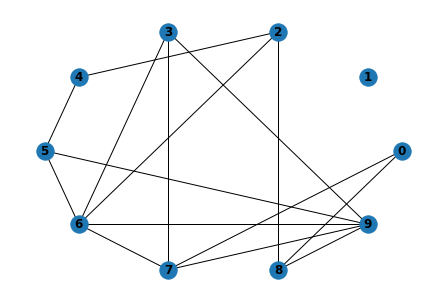

In [124]:
H = nx.gnm_random_graph(10, 15)
while nx.is_connected(H):
    H = nx.gnm_random_graph(10, 15)
nx.draw_circular(H, with_labels=True, font_weight='bold')

**Question 2** : Appliquez la fonction `DFSTraversal` au graphe `H`. Que constatez-vous ?

In [125]:
DFSTraversal(H, 0)

[0, 8, 9, 5, 6, 7, 3, 2, 4]

**Réponse** :

### Le sommet non connecté n'est pas listé dans la reponse de la fonction car il n'est pas connecté au graph


**Question 3** : Utilisez la fonction `DFSTraversal` pour écrire une fonction `isConnected(G)` qui renvoie `True` si `G` est connexe, et `False` sinon. Testez-la sur les graphes `G` et `H`.

In [131]:
def isConnected(graph):
    list = []
    list = DFSTraversal(graph, 0)
    if len(list) != graph.number_of_nodes():
        return False
    else:
        return True


print("Is G connected ?:")
print(isConnected(G))
print("Is H connected ?:")
print(isConnected(H))


Is G connected ?:
True
Is H connected ?:
False


**Question 4** : Utilisez la fonction `DFSTraversal` pour écrire une fonction `connectedComponents` qui renvoie la liste de *toutes* les composantes connexes d'un graphe. *Réfléchissez bien à la complexité algorithmique de la solution mise en oeuvre*.

In [165]:
def connectedComponents(graph):
    list = DFSTraversal(graph, 0)
    components = []
    components.append(list)
    nodes = graph.nodes
    notconnected = [x for x in nodes if x not in list]
    for n in range(len(notconnected)):
        components.append(DFSTraversal(graph, notconnected[n]))

    return components


connectedComponents(H)


[[0, 8, 9, 5, 6, 7, 3, 2, 4], [1]]

**Réponse** :

**Question 5** : Utilisez la fonction `connectedComponents` pour écrire une deuxième version de la fonction `isConnected(G)`. Laquelle des deux fonctions est à privilégier et pourquoi ?

In [168]:
def isConnected_v2(G):
    components = connectedComponents(G)
    if len(components) > 1:
        return False
    else:
        return True

print(isConnected(G))
print(isConnected(H))
    


True
False


**Réponse** :

Plus optimisé dans la v1 car complexité moins élevée

## Question 4 : Algorithme de Kruskal
**Question 1** : Utilisez les fonctions existantes de NetworkX pour transformer `G` en un graphe **pondéré**, où chaque arête a un poids aléatoire compris entre `0` et `10`.

In [175]:
import random as rd

for a,b,c in G.edges(data=True):
    G[a][b]['weight'] = rd.randint(0,10)


**Question 2** : Implémentez l'algorithme de Kruskal dans une fonction `Kruskal(G)`. Cette fonction doit renvoyer la *liste des arêtes* constituant un arbre couvrant de poids minimum.

💡 Utilisez la fonction `is_forest` de Networkx pour détecter les cycles. 

In [176]:
def Kruskal(G):
    edges_sorted = sorted(G.edges(data=True), key=lambda node: node[2].get('weight', 1))
    final = []
    graph = nx.Graph()
    graph.add_edge(edges_sorted[0][0], edges_sorted[0][1])
    for node in edges_sorted:
        graph.add_edge(node[0], node[1])
        if not nx.is_forest(graph):
            graph.remove_edge(node[0], node[1])
        else:
            final.append(node)
    return final
      
Kruskal(G)



[(2, 5, {'weight': 0}),
 (3, 8, {'weight': 2}),
 (3, 9, {'weight': 2}),
 (5, 6, {'weight': 3}),
 (2, 7, {'weight': 4}),
 (0, 3, {'weight': 5}),
 (0, 4, {'weight': 5}),
 (2, 9, {'weight': 5}),
 (1, 4, {'weight': 10})]

Testez votre fonction sur le graphe pondéré `G`, en affichant l'arbre couvrant obtenu (vous pouvez affichez seulement l'arbre, ou surligner les arêtes sur le graphe `G`).

## Exercice 5 : Algorithme de Prim
**Question 1** : implémentez l'algorithme de Prim, et testez-le sur le graphe pondéré `G`.

In [ ]:
def Prim(G, s):
    MAX = 9999999
    visiter = [False] * G.number_of_nodes()
    parents = [None] * G.number_of_nodes()
    weights = [MAX] * G.number_of_nodes()
    weights[s] = 0
    sommet = s
    visiter[s] = True

    while False in visiter:
        neighbors = G.neighbors(sommet)

        for n in neighbors:
            weight_edge = G[sommet][n]["weight"]
            if weight_edge < weights[n] and not visiter[n]:
                weights[n] = weight_edge
                parents[n] = sommet

        w_min = MAX #Pour comparer avec la plus grand valeur et ne pas etre bloqué
        for i in list(G.nodes):
            if not visiter[i]:
                if weights[i] <= w_min:
                    sommet = i
                    w_min = weights[i]
        visiter[sommet] = True

    F = nx.Graph()
    for n in list(G.nodes):
        if parents[n] != None:
            F.add_edge(n, parents[n])
            F[n][parents[n]]['weight'] = weights[n]
    return F


A = Prim(G, 6)

pos = nx.spring_layout(A)
nx.draw_networkx(A, pos)
labels = nx.get_edge_attributes(A, 'weight')
nx.draw_networkx_edge_labels(A, pos, edge_labels=labels)


## Exercice 6: détection de cycle dans un graphe
**Question 1** : Comment peut-on détecter les cycles dans un graphe à l'aide d'un parcours en profondeur ? Ecrivez la fonction `hasCycle(G)`.

Testez la fonction `hasCycle` sur le graphe `G` et sur un arbre aléatoire `T`:

**Question 2** : Ecrivez une fonction `isTree(G)` qui renvoie `True` si et seulement si `G` est un arbre.